<a href="https://colab.research.google.com/github/IshaSinghVatsa/Machine-Learning/blob/main/Lab6_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

In [ ]:
# Importing the required packages 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

In [ ]:
# import Dataset 
balance_data = pd.read_csv('/content/heart.csv')
balance_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Separating the target variable 
X = balance_data[['cp','trtbps']]
Y = balance_data.output

In [ ]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [ ]:
# perform training with giniIndex
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100)
# Fit the model 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
# Function to make predictions 
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred 

In [ ]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

In [ ]:
# Operational Phase 
print("Results Using Gini Index:")
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0]
Accuracy :  74.72527472527473


In [ ]:
#Print tree
def printTree(classifier):
    feature_names = ['Chest Pain', 'Rest BP']
    target_names = ['Yes', 'No']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

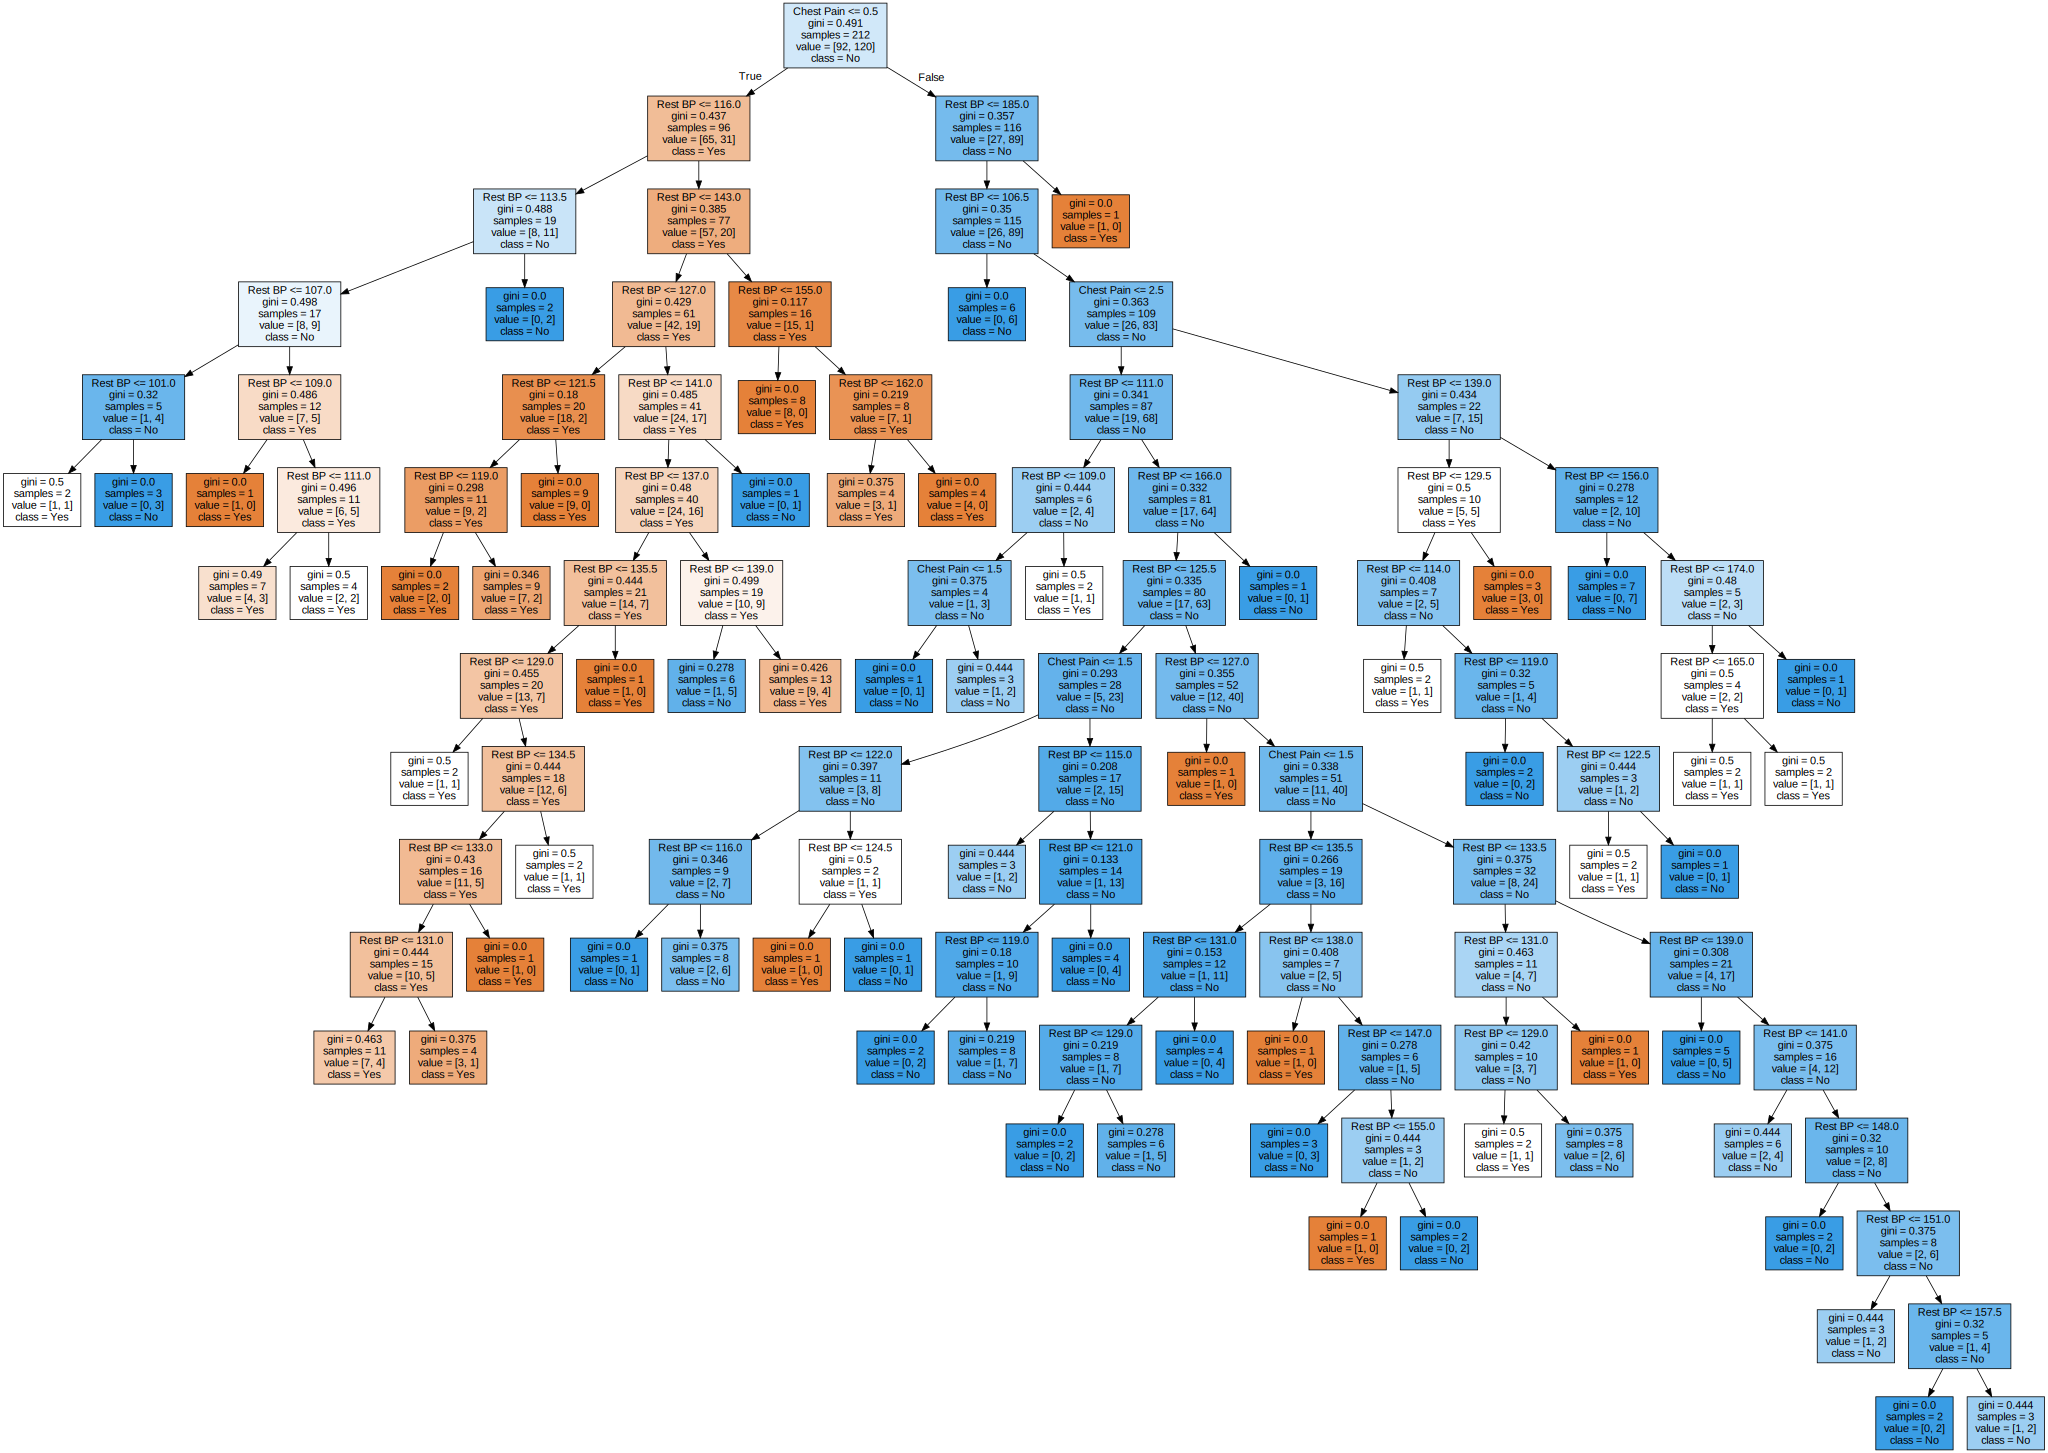

In [ ]:
#Print Gini tree
tr_gini = printTree(clf_gini)
tr_gini

# Linear Regression on dataset given

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix


In [ ]:
energy = pd.read_csv('/content/Folds5x2_pp - Sheet1.csv')
energy.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
col_names = ['temperature','ambient_pressure','exhaust_vacuum', 'relative_humidity','energy_output']

In [ ]:
energy.columns = col_names
energy.head()

,temperature,ambient_pressure,exhaust_vacuum,relative_humidity,energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
energy = pd.DataFrame(scaler.fit_transform(energy.values), columns=energy.columns, index=energy.index)
energy

,temperature,ambient_pressure,exhaust_vacuum,relative_humidity,energy_output
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9563,0.420397,0.432918,0.522643,0.877212,0.526755
9564,0.322380,0.245907,0.761693,0.552547,0.653775
9565,0.835977,0.871352,0.495669,0.146381,0.123311
9566,0.642210,0.784520,0.518931,0.493700,0.205033


In [ ]:
energy.describe()

,temperature,ambient_pressure,exhaust_vacuum,relative_humidity,energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.505417,0.515050,0.504060,0.640067,0.451722
std,0.211118,0.226119,0.146963,0.195714,0.226053
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331445,0.291459,0.401138,0.506267,0.258146
50%,0.525071,0.475445,0.496164,0.662399,0.414437
75%,0.677337,0.732740,0.603069,0.794504,0.638013
max,1.000000,1.000000,1.000000,1.000000,1.000000


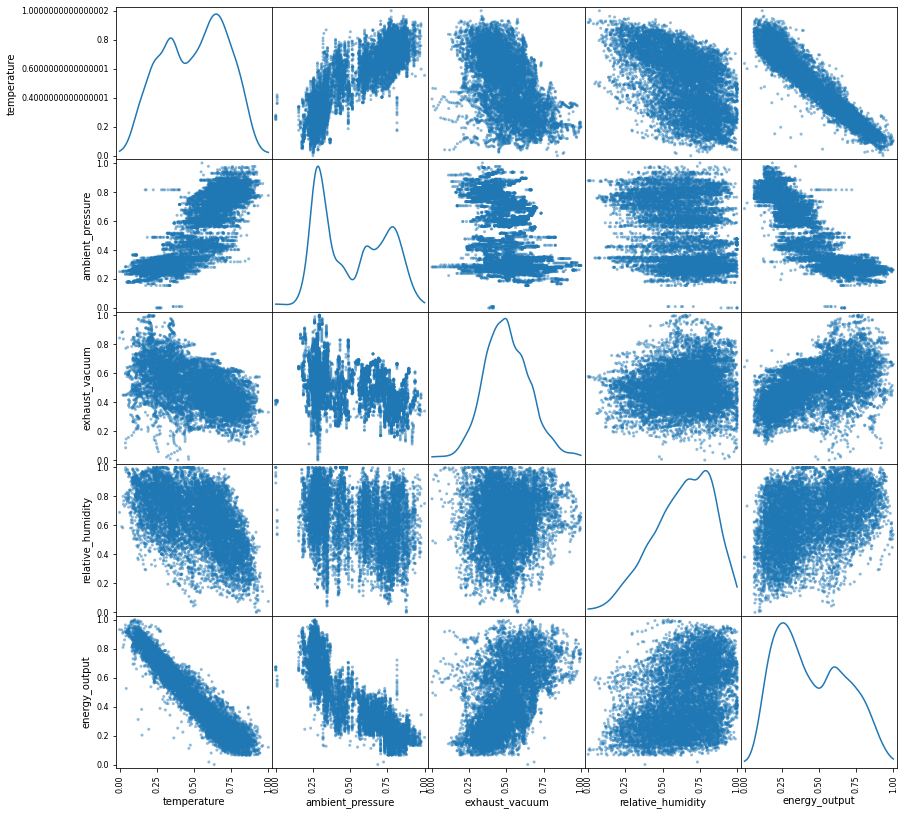

In [ ]:
scatter_matrix(energy, figsize=(14, 14),diagonal="kde");

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(energy, test_size = 0.2, random_state = 0)
energy_tr = train_set.copy()

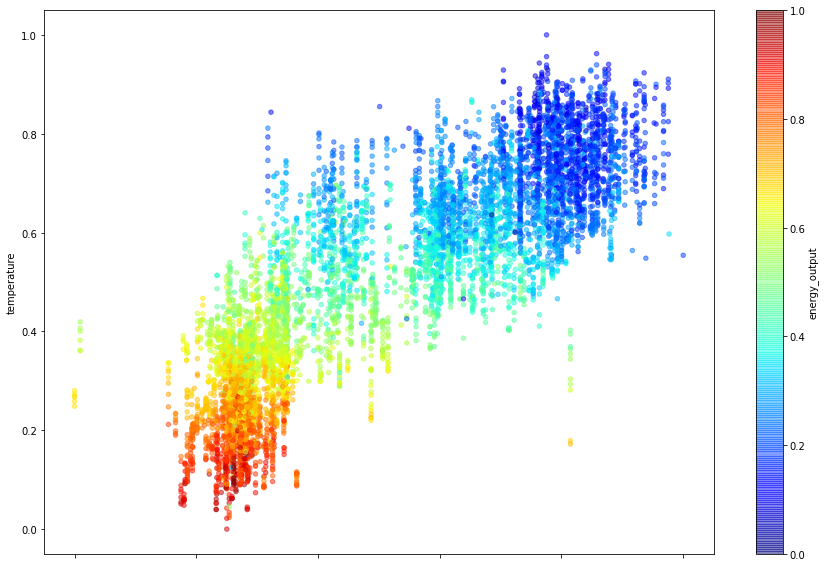

In [ ]:
import matplotlib.pyplot as plt

energy_tr.plot(kind = 'scatter', x = 'ambient_pressure', y = 'temperature', alpha = 0.5, 
              c = 'energy_output', cmap = plt.get_cmap('jet'), colorbar = True, figsize = (15,10)
              )
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
energy_tr = energy_tr.drop(['exhaust_vacuum','relative_humidity','energy_output'], axis = 1)

In [ ]:
X = energy_tr.iloc[:, :-1].values
y = energy_tr.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Fitting Simple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0.266726,0.164081
1,0.706406,0.717074
2,0.711388,0.736971
3,0.701601,0.509572
4,0.778826,0.800798
...,...,...
2292,0.614947,0.585544
2293,0.346619,0.378818
2294,0.571886,0.637484
2295,0.819751,0.754543


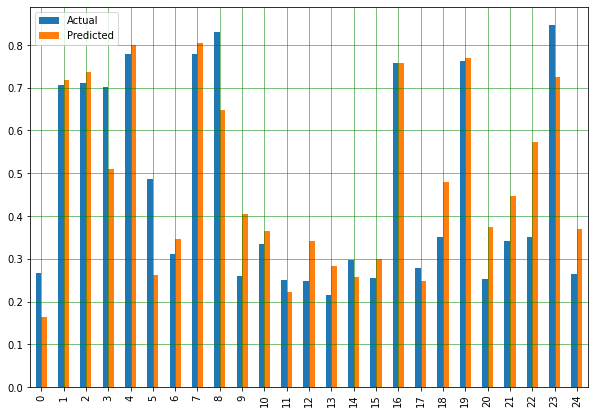

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

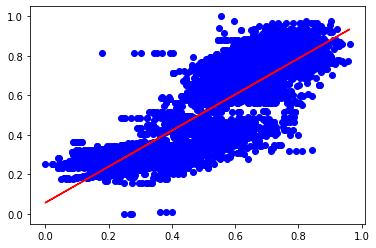

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')

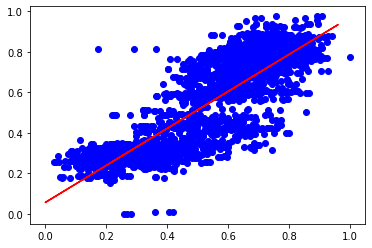

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
# plt.title('Pollutant_min vs lable (Test set)')
# plt.xlabel('pollutant_min')
# plt.ylabel('lable')
plt.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09642548593828648
Mean Squared Error: 0.01515166955741863
Root Mean Squared Error: 0.12309211817747971
